In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [162]:
trainData = pd.read_csv("G:\Coding Blocks\Documents\Train.csv")
trainData.head(n=5)
testData = pd.read_csv("G:\Coding Blocks\Documents\Test.csv")
test = testData.values
data = trainData.values
x = data[:,:5]  #Training Data
y = data[:,5]   #Training Data Output
xt = test[:,:5] #Test Data
yt = test[:,5]  #Test Data Output
print(type(trainData))
print("Data of X")
print(x[:5,],type(x))
print("Data of Y")
print(y[:5],type(y))
print("shape of x:")
print(x.shape)
print("Shape of y:")
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
Data of X
[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 [ 0.17531181  0.14319424 -0.58111096 -0.12210693 -1.29216807]
 [-1.69301097  0.54271187 -2.79872942 -0.68672304  1.24407683]] <class 'numpy.ndarray'>
Data of Y
[-82.15466656 -48.89796018  77.2703707   -2.98858081 -37.59672212] <class 'numpy.ndarray'>
shape of x:
(1600, 5)
Shape of y:
(1600,)


# Answer1 = Number of Features = 5

In [164]:
temp1 = x[1,]
print(temp1.shape[0])
print(temp1)

5
[-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]


# Implementation of Batch_Gradient linear Regression

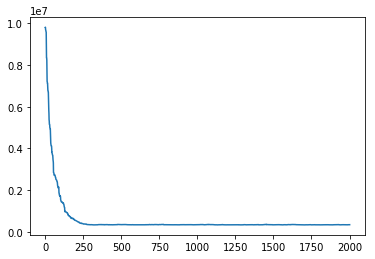

In [189]:
def hypothesis(x,theta):
    h = theta[0]
    for i in range(x.shape[0]):
        h += theta[i+1]*x[i]
    return h

# Testing hypothesis Function
# x1 = np.array([[1,2,1],[4,5,6],[0,0,0],[1,1,1]])
# y1 = np.array([1,2,3,4])
# theta = np.array([2,1,3,5])
# print(hypothesis(x1,theta))
    
def error(x,y,theta):
    e = 0
    for i in range(x.shape[0]):
        h = hypothesis(x[i,],theta)
        e += (h - y[i])**2
    return e/2

# Testing for error function
# print(error(x1,y1,theta))

def descent(x,y,theta,batch_size = 5):
    m = y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((theta.shape[0],))
    for i in indices:
        h = hypothesis(x[i,],theta)
        grad[0] += y[i] - h
        for j in range(1,grad.shape[0]):
            grad[j] = (y[i] - h)*x[i,j-1]
    return grad
        
def gradient_descent(x,y,learning_rate = 0.01):
    m =  x.shape[1] + 1
    theta = np.zeros((m,))
    e = error(x,y,theta)
    de =e
    error_list = [e]
    itr = 0
    while(itr <= 2000):
        grad = descent(x,y,theta)
        theta = theta + learning_rate*grad
        ne = error(x,y,theta)
        error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta

e,theta = gradient_descent(x,y)
plt.plot(e)
plt.show()

# working of   
# g =  descent(x1,y1,theta)
# print(g,type(g))
            

## Answer 2

In [199]:
print("Value of coefficients are:")
print(theta)
print("Value of intercept is:")
print(theta[0])
print("Hypothesisc 'rounded off coef' is :")
temp = ""
for i in range(theta.shape[0]):
    temp += str(round(theta[i]))+"*x"+str(i)+" "
print(temp)

Value of coefficients are:
[ 2.46928808 30.25523107 93.2259267   8.5811449  42.24356992  1.57582054]
Value of intercept is:
2.4692880813071048
Hypothesisc 'rounded off coef' is :
2.0*x0 30.0*x1 93.0*x2 9.0*x3 42.0*x4 2.0*x5 


# Implementation of Coefficient of Determination

In [200]:
print(e[-1])
def test(x,y,theta):
    avg = y.mean()
    m = y.shape[0]
    r = 0.0
    x1 = 0.0
    x2 = 0.0
    for i in range(y.shape[0]):
        temp1 = y[i] - hypothesis(x[i,],theta)
        x1 += temp1**2
        temp2 = y[i] - avg
        x2 += temp2**2
    r = x1/x2
    r = 1 - r
    return r
print("Score of test data")
print(test(xt,yt,theta))
print("Score of training data")
print(test(x,y,theta))


343938.5694063715
Score of test data
0.96763809096307
Score of training data
0.9649214912721003


# Answer 3 : test data has scored slightly better  in the test

In [188]:
print(x[2,],y[2])
print(x[2,],hypothesis(x[2,],theta))

[ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416] 77.27037069642637
[ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416] 47.364891289332995
